In [2]:
import numpy as np
from ordering import order_bit_rev , dec_to_bin
#from scipy.fft import fft
from matplotlib import pyplot as plt

In [3]:
def get_index_pair(n,stg):
    flag = 1
    x = np.arange(n)
    delta_stp = 2**(stg)
    grp_1 , grp_2 = [] , []
    for i in range(0,len(x),delta_stp):
        for k in range(i,i+delta_stp):
            #print(k , flag)
            if(flag==1):
                grp_1.append(x[k])
            else: grp_2.append(x[k])
            #print(flag)
        flag*=-1
    index_pair = [[i1,i2] for i1,i2 in zip(grp_1, grp_2)]
    return index_pair

def butterfly_fft(x , w ):
    f0 = x[0] + w*x[1]
    f1 = x[0] - w*x[1]
    return ([f0,f1])
def butterfly_ifft(x , w ):
    f0 = x[0] + x[1]
    f1 = w*(x[0] - x[1])
    return ([f0,f1])

In [4]:
def compute_fft(x):
    stages = int(np.log2(len(x)))
    x = order_bit_rev(x)
    for stg in range(stages):
        ind = get_index_pair(len(x),stg)
        i = 0
        N = 2**(stg+1)
        for pair in ind:
            k = i%(2**(stg))
            inp_pair = [x[pair[0]] , x[pair[1]]]
            w = np.exp(-(2j*np.pi*k)/(N)).round(15)
            x[pair[0]],x[pair[1]] = butterfly_fft(inp_pair , w)
            i+=1
    x = [round(x_i, 8) for x_i in x]
    l = len(x)
    omega = np.arange(0,l , step=1)
    omega = [(2*np.pi*om)/l for om in omega]
    return x , omega
    
def compute_ifft(x):
    l = len(x)
    stages = int(np.log2(l))
    for stg in range(stages):
        stg_ord = stages - stg - 1
        ind = get_index_pair(len(x),stg_ord)
        i = 0
        N = 2**(stg_ord+1)
        for pair in ind:
            k = i%(2**(stg_ord))
            inp_pair = [x[pair[0]] , x[pair[1]]]
            w = np.exp((2j*np.pi*k)/(N)).round(15)
            x[pair[0]],x[pair[1]] = butterfly_ifft(inp_pair , w)
            i+=1
    x = order_bit_rev(x)
    x = [round(float(x_i/8) , 4)  for x_i in x]
    omega = np.arange(0, l , step=1)
    omega = [(2*np.pi*om)/l for om in omega]
    return x , omega

In [7]:
x = np.asarray([1,0,1,0,0,0,1,0])
x_f , _= compute_fft(x)
print("x:" , x)
print("Using Numpy :" ,np.fft.fft(x))
print('F(x) :',x_f)
x_if = compute_ifft(x_f)
print('F_inv(F(x)): ',x_if)

x: [1 0 1 0 0 0 1 0]
Using Numpy : [ 3.+0.j  1.+0.j -1.+0.j  1.+0.j  3.+0.j  1.+0.j -1.+0.j  1.+0.j]
F(x) : [(3+0j), (1+0j), (-1+0j), (1+0j), (3+0j), (1+0j), (-1+0j), (1+0j)]
F_inv(F(x)):  ([1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138])


In [8]:
def f(t):
    val = np.cos(6*np.pi*t)
    return val

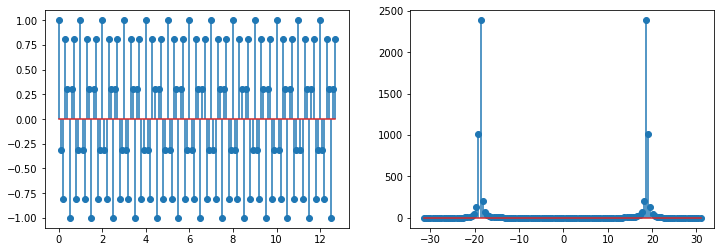

In [47]:
n = 128
t = []
t_0 = 0   
delta_t = 0.1
for i in range(n):
    t.append(t_0 +  i*delta_t)
#t = np.linspace(0, 1 , 128)
t = np.asarray(t)
del_T = t[-1]-t[0]
del_om  = (2*np.pi)/del_T
om = np.linspace(-(n/2)*del_om ,(n/2)*del_om  , n)
om = np.fft.fftfreq(n , delta_t)
ft= f(t)

#print(len(f(t)))

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.stem(t,ft , linefmt='-')
ax2 = fig.add_subplot(122)
ax2.stem(2*np.pi*om,fw_p)
plt.show()
fw , omega = compute_fft(ft)
#fw = np.fft.fft(ft)
fw_p = [abs(f)**2 for f in fw]
#print(fw)

#plt.show()

In [208]:
def analysis(delta_t , n , t_0 = 0):
    #n = 128
    t = []
    #t_0 = 0   
    #delta_t = 0.1
    for i in range(n):
        t.append(t_0 +  i*delta_t)
    #t = np.linspace(0, 1 , 128)
    t = np.asarray(t)
    ft= f(t)
    #print(len(f(t)))
    plt.stem(t,ft , linefmt='--')
    plt.show()
    fw , omega = compute_fft(ft)
    fw_p = [abs(f)**2 for f in fw]
    #print(fw)
    plt.stem(omega,fw_p)
    plt.show()

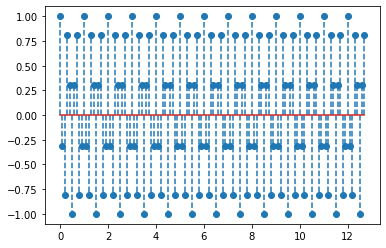

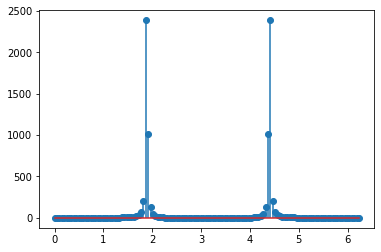

In [210]:
analysis(0.1 , 128)

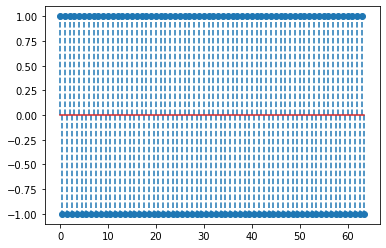

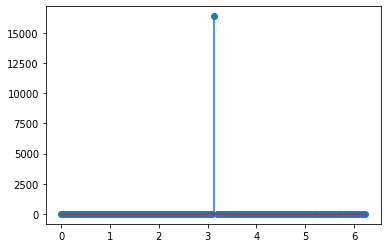

In [211]:
analysis(0.5 , 128)